#  Exploratory Data Analysis on Oxy Health Insurance

Oxy Health Insurance is a cutting edge tech company revoluntionizing the health insurance industry. With a focus of innovation and customer-centric solution. Oxy Health Insurance leverage advanced technologies to provide seamless, efficient and personalised health insurance services. Thier comprehensive platform offers a wide range of features including easy online enrollment, real time claim processing and personalised management tools.

### Importing Libraries  and Connecting to DataFrame

In [1]:
# import the libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [2]:
# to ignore warning

import warnings
warnings.filterwarnings("ignore")

In [3]:
# read the data file

df= pd.read_csv("insurance dataset.csv")

### Cleaning the Data

In [4]:
##  Check the shape, features, info of the DataFrame
#  df.head()
#  df.shape
#  df.info()
#  df.columns

##  Numerical Statistical Analysis
#  df.describe()

##  Categorical Statistical Analysis
#  df.describe(include=["object", "bool"])

### Investigate the Missing data

In [5]:
null_val= df.isnull().sum() 
null_val

ID             1
Name        1328
Age            5
Sex            7
bmi            0
children       0
Smoker         0
Region         0
Charges        0
dtype: int64

### Visualise the DataFrame to see the missing Data

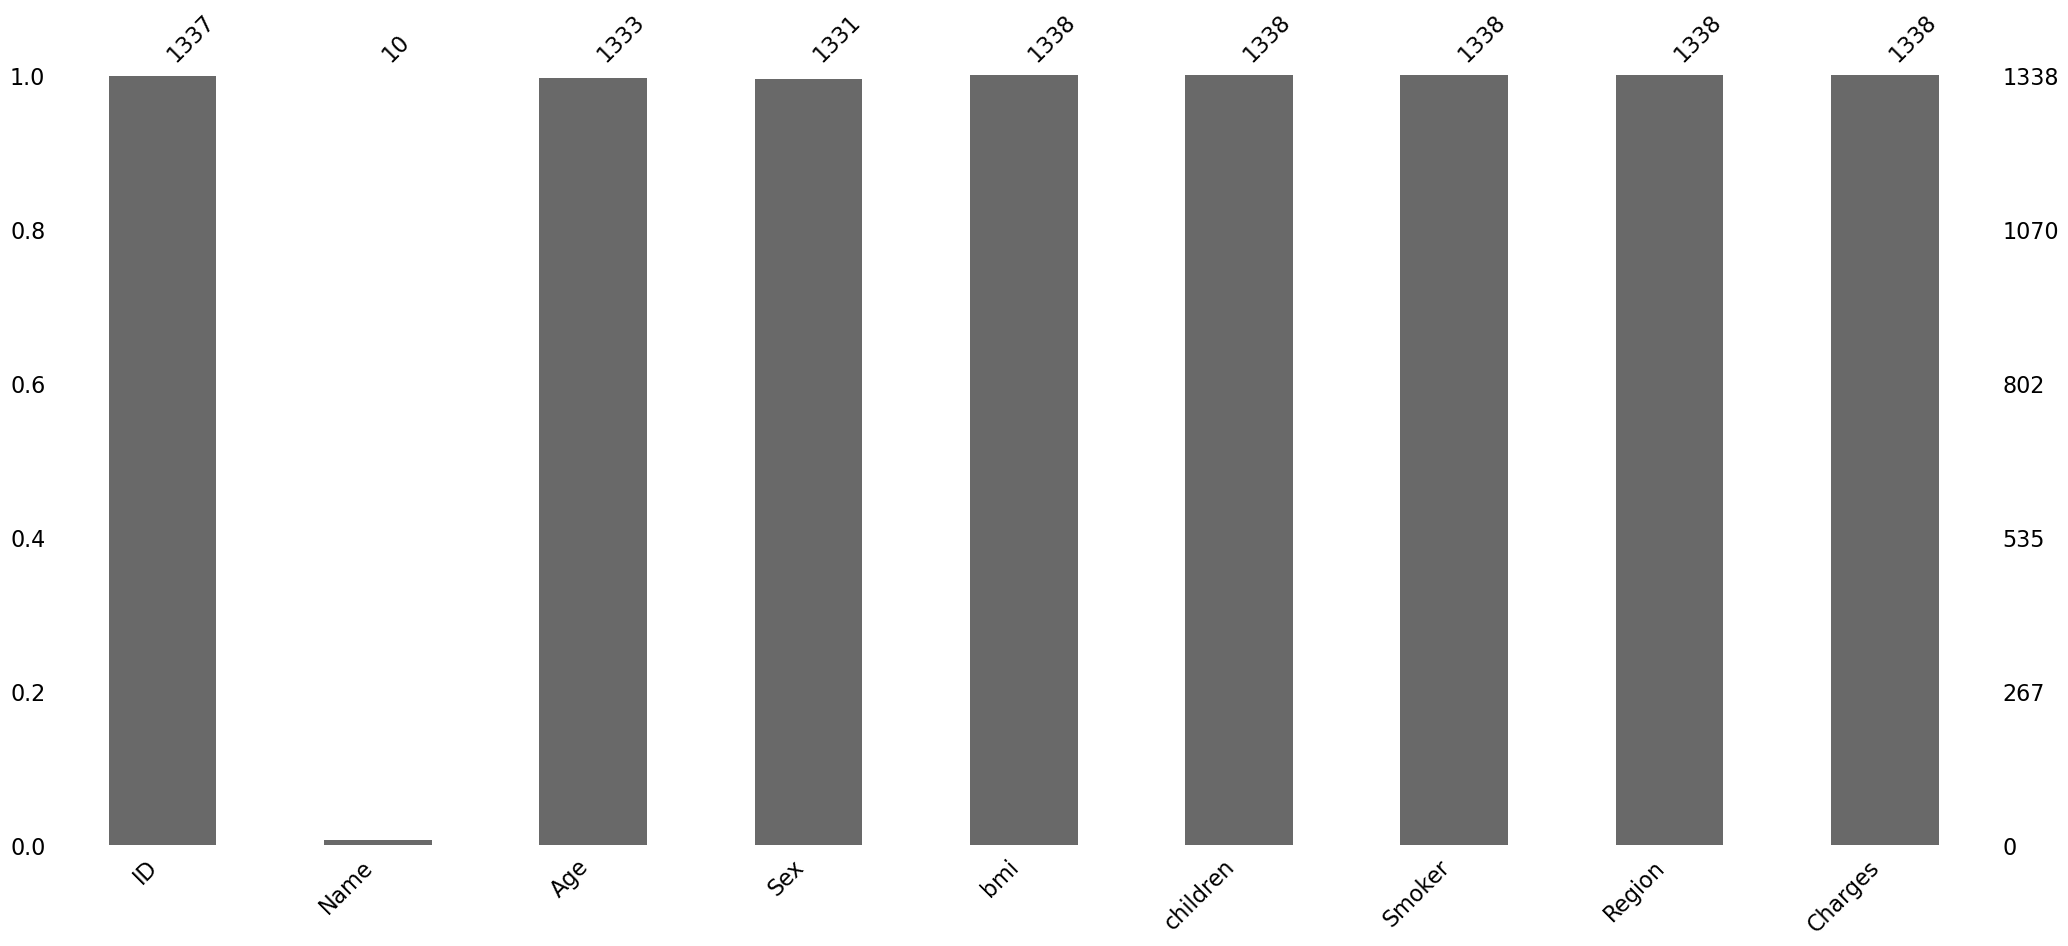

In [6]:
msno.bar(df);

### Drop the missing Data columns (Name)

In [7]:
df.drop(["Name"], axis= 1, inplace= True)

### Check the missing values in Age

In [8]:
df[df["Age"].isnull()]

## (Remove the hash key from below to check diffrent ways to check the missing values in Age  )

# df.isnull().sum()
# df["Age"].isna()
# df.Age.isnull()
# df[df["Age"].isna()]
# df[~df["Age"].isna()]

,ID,Age,Sex,bmi,children,Smoker,Region,Charges
5,1006.0,NaN,female,25.740,0,no,southeast,3756.62160
12,1013.0,NaN,male,34.400,0,no,southwest,1826.84300
27,1028.0,NaN,female,32.775,2,no,northwest,12268.63225
42,1043.0,NaN,male,21.780,1,no,southeast,6272.47720
60,1061.0,NaN,male,27.360,3,no,northeast,8606.21740


### Mean of Age to fill the missing values in Age column

In [9]:
# Mean Age by Sex
df.groupby(["Sex"])["Age"].mean()

Sex
female    39.501524
fimale    53.000000
male      38.977578
Name: Age, dtype: float64

In [10]:
# Mean Generic Age
df["Age"].mean()

39.2093023255814

### Replacing the null Age with the generic mean Age

In [11]:
if df["Sex"].any():
    df["Age"]=df["Age"].fillna(value= df["Age"].mean())
else:
    df["Age"]=df["Age"].fillna(value= df["Age"].mean()) 
    
## method 2
# if df["Sex"].any():
    # df["Age"]=df["Age"].fillna(39.2093023255814)

### Checking values counts by unique Sex

In [12]:
df.Sex.value_counts()

male      672
female    658
fimale      1
Name: Sex, dtype: int64

### Replace fimale with female

In [13]:
df.loc[df["Sex"] == "fimale", "Sex"] = "female"

### Checking for missing value in Sex

In [14]:
df[df.Sex.isnull()]

,ID,Age,Sex,bmi,children,Smoker,Region,Charges
15,1016.0,19.0,NaN,24.600,1,no,southwest,1837.23700
30,1031.0,22.0,NaN,35.600,0,yes,southwest,35585.57600
36,1037.0,62.0,NaN,32.965,3,no,northwest,15612.19335
1307,2308.0,32.0,NaN,28.120,4,yes,northwest,21472.47880
1313,2314.0,19.0,NaN,34.700,2,yes,southwest,36397.57600
1329,2330.0,52.0,NaN,38.600,2,no,southwest,10325.20600
1335,2336.0,18.0,NaN,36.850,0,no,southeast,1629.83350


### Checking for missing values in the DataFrame

In [15]:
# df.isnull().any(axis=1)
df[df.isnull().any(axis=1)]

,ID,Age,Sex,bmi,children,Smoker,Region,Charges
15,1016.0,19.0,NaN,24.600,1,no,southwest,1837.23700
29,NaN,31.0,male,36.300,2,yes,southwest,38711.00000
30,1031.0,22.0,NaN,35.600,0,yes,southwest,35585.57600
36,1037.0,62.0,NaN,32.965,3,no,northwest,15612.19335
1307,2308.0,32.0,NaN,28.120,4,yes,northwest,21472.47880
1313,2314.0,19.0,NaN,34.700,2,yes,southwest,36397.57600
1329,2330.0,52.0,NaN,38.600,2,no,southwest,10325.20600
1335,2336.0,18.0,NaN,36.850,0,no,southeast,1629.83350


### Checking the 10 max Charges

In [16]:
df.nlargest(10, 'Charges')

,ID,Age,Sex,bmi,children,Smoker,Region,Charges
543,1544.0,54.0,female,47.410,0,yes,southeast,63770.42801
1300,2301.0,45.0,male,30.360,0,yes,southeast,62592.87309
1230,2231.0,52.0,male,34.485,3,yes,northwest,60021.39897
577,1578.0,31.0,female,38.095,1,yes,northeast,58571.07448
819,1820.0,33.0,female,35.530,0,yes,northwest,55135.40209
1146,2147.0,60.0,male,32.800,0,yes,southwest,52590.82939
34,1035.0,28.0,male,36.400,1,yes,southwest,51194.55914
1241,2242.0,64.0,male,36.960,2,yes,southeast,49577.66240
1062,2063.0,59.0,male,41.140,1,yes,southeast,48970.24760
488,1489.0,44.0,female,38.060,0,yes,southeast,48885.13561


### Drop the rows with missing values

In [17]:
df.dropna(inplace = True)

### Cross-checking for missing values

In [18]:
df.isnull().sum()

ID          0
Age         0
Sex         0
bmi         0
children    0
Smoker      0
Region      0
Charges     0
dtype: int64

##  Exploring the Data and Digging for Valuable insights

In [19]:
df.columns

Index(['ID', 'Age', 'Sex', 'bmi', 'children', 'Smoker', 'Region', 'Charges'], dtype='object')

### Heatmap showing the correlation of the numerical data

Client Age and Body Mass Index is seen to be 0.3  and 0.2 corrolated to Charges respectively 

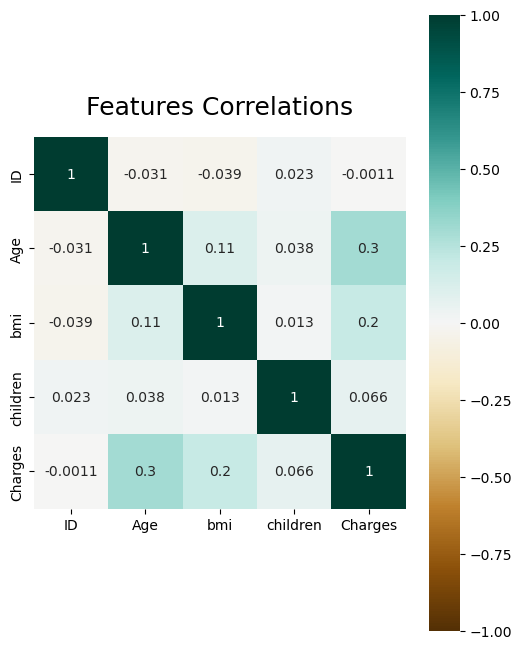

In [20]:
# a=df.corr()
# fig, axs=plt.subplots(figsize=(15,10))
# sns.heatmap(a, vmax=.8, square=True, annot=True);

#a= df.corr()
#plt.figure(figsize=(15,10))
#sns.heatmap(a, vmax=.8, square=True, annot=True);

plt.figure(figsize=(6, 8))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, square=True, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlations', fontdict={'fontsize':18}, pad=16);

### Visuals
Smokers and Non-smokers by BMI on bar chart | Age group by Charges and Client | Charges and Customer by Region | Distribution of Age by Charges | Total no. of children by Age group | Gender Distribution | BMI(Body Mass Index) by Charges

### Using Matplotlib Only.
#### BMI by Smokers and Non-smokers on a bar chart.
Using Matplotlib library only on this visual to spot the different with Seaborn on the next visual.

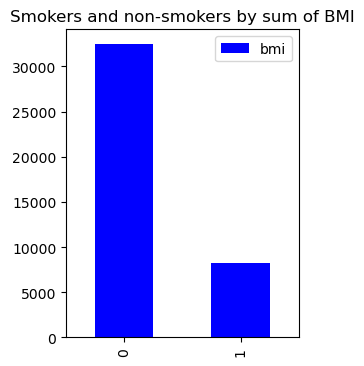

In [21]:
smoker_BMI = df.groupby("Smoker")["bmi"].sum().reset_index()
smoker_BMI

#df['Charges'].plot(kind='hist', bins=20)
#df.plot(kind='hist', x='Smoker', y='bmi')# scatter plot
smoker_BMI.plot(kind='bar', color='blue', figsize=(3,4), title='Smokers and non-smokers by sum of BMI');

### Using Matplotlib and Seaborn

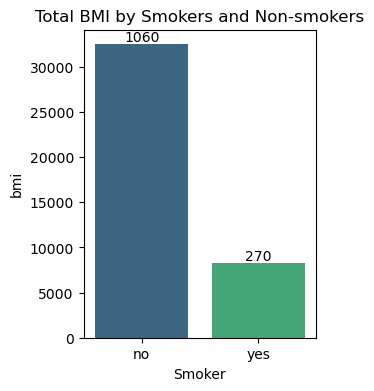

In [22]:
plt.figure(figsize=(3,4))

cust_prof= df.groupby("Smoker")["bmi"].sum().reset_index()
Smoke= sns.barplot(x="Smoker", data=cust_prof, y= "bmi", palette= "viridis", order=df["Smoker"].value_counts(ascending=False).index)
values= df["Smoker"].value_counts(ascending=False).values
Smoke.bar_label(container= Smoke.containers[0], labels= values)
plt.title("Total BMI by Smokers and Non-smokers")
plt.show()

In [23]:
# sum of Charges by Smoker and Non smoker
cust_chr= df.groupby("Smoker")["Charges"].sum().reset_index()
cust_chr

,Smoker,Charges
0,no,8.944657e+06
1,yes,8.649597e+06


#### Charts above and DataFrame below show that smokers are generating more Income:  Smokers make up 25.4% of the population in the distribution and account for £8,649,597 of the total income, which corresponds to 49% of the overall income. On the other hand, non-smokers contributed £8,944,657 to the total income.

### Using Matplotlib Only 
#### Create the Age group column & group the charges by Age group on a horrizontal bar
Using only the Matplotlib library, the visualization below is used to observe and identify any differences compared to the next visualization that will utilize the Seaborn library.

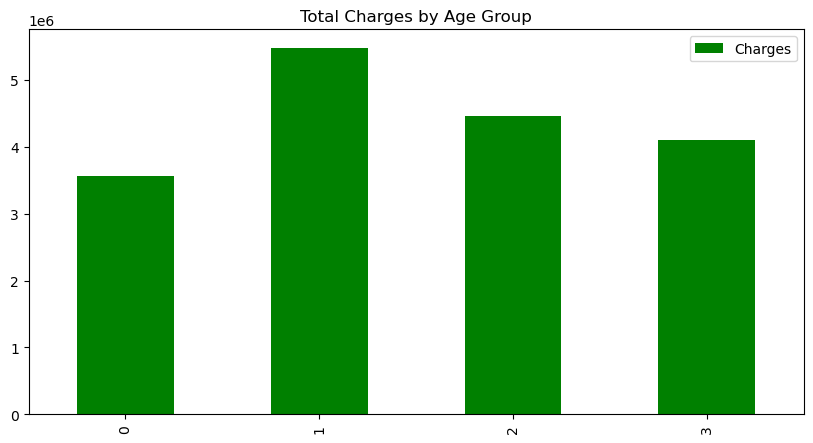

In [24]:
# Create the age group column & group the charges by Age group on a horrizontal bar

def age_group(x):
    if  x <= 30:
        return "Youth(=30)"
    elif x <= 42:
        return "Adult(<=42)"
    elif x <= 54:
        return "Elder(<=54)"
    else:
        return "Senior Citizen(>55)"

df["Age_Group"] = df["Age"].apply(age_group)

# visualizing
age_charge = df.groupby("Age_Group")["Charges"].sum().reset_index()
age_charge

age_charge.plot(kind= "bar", color= "green", figsize= (10,5), title= "Total Charges by Age Group");


### Using Matplotlib and Seaborn

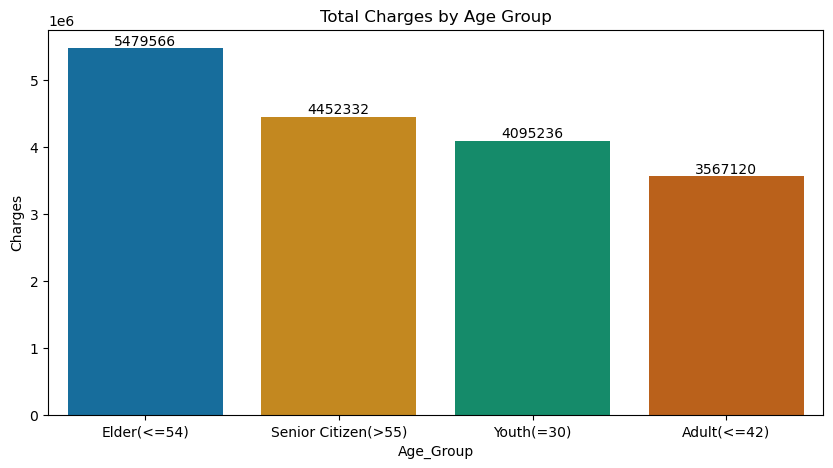

In [25]:
plt.figure(figsize=(10, 5))

age_charge = df.groupby("Age_Group")["Charges"].sum().reset_index()
values = df["Age_Group"].value_counts(ascending=False).values

# Sort the DataFrame in descending order based on the Charges column
age_charge = age_charge.sort_values(by="Charges", ascending=False)

age_chr = sns.barplot(x="Age_Group", data=age_charge, y="Charges", palette="colorblind", order=age_charge["Age_Group"])

for i, value in enumerate(age_charge['Charges']):
    plt.text(i, value, f'{value:.0f}', ha='center', va='bottom')

plt.title("Total Charges by Age Group")
plt.show()


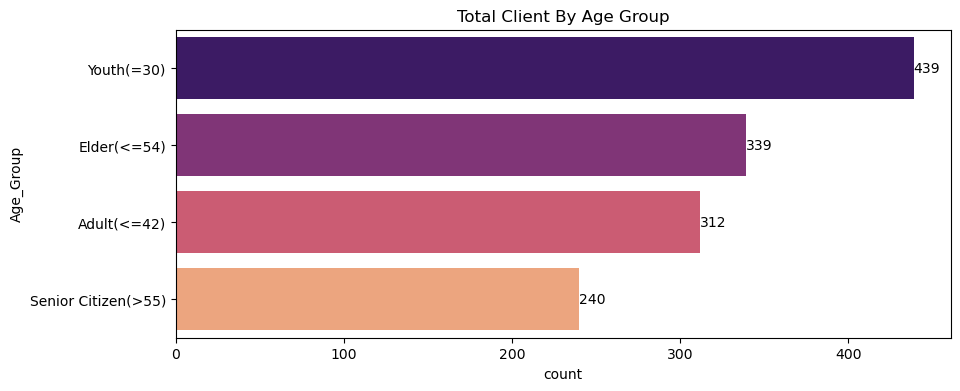

In [26]:
plt.figure(figsize = (10,4))
sales = sns.countplot(y=df["Age_Group"], palette= "magma", order=df["Age_Group"].value_counts(ascending = False).index)
values = df["Age_Group"].value_counts(ascending = False).values
sales.bar_label(container = sales.containers[0], labels=values)
plt.title("Total Client By Age Group")
plt.show()

In [27]:
age_charge = df.groupby("Age_Group")["Charges"].sum().reset_index()
age_charge

,Age_Group,Charges
0,Adult(<=42),3.567120e+06
1,Elder(<=54),5.479566e+06
2,Senior Citizen(>55),4.452332e+06
3,Youth(=30),4.095236e+06


In [28]:
age_charge_count = df.groupby("Age_Group")["Charges"].count().reset_index()
age_charge_count

,Age_Group,Charges
0,Adult(<=42),312
1,Elder(<=54),339
2,Senior Citizen(>55),240
3,Youth(=30),439


#### According to the charts and DataFrame above, it is evident that the Age group 43-54 generated the highest income, accounting for 31.1% of the total income. The Age Group 55 and above contributed 25.3% of the income, while 23.4% of the income was generated by the Age Group 30 and below, and 20.2% by the Age Group 31-42.

#### In terms of population distribution, the highest percentage, 33%, belongs to the Age group 30 and below. Following that, the Age group 43 to 54 comprises 25.5% of the population, followed by the Age group 31 - 42 at 23.5%, and lastly, the Age group 55 and above with 18% of the population.

### Client by Region and Charges by Region

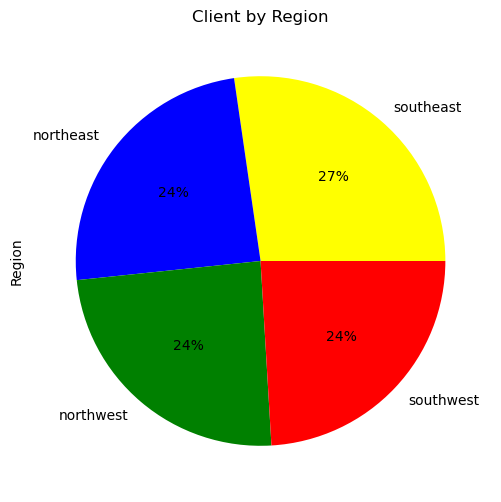

In [29]:
# Count by Regoin on a pie chart

df["Region"].value_counts().plot(kind= "pie",colors=["yellow", "blue", "green", "red"], figsize=(6,6), title= "Client by Region", autopct='%1.0f%%');


In [30]:
# Client by Region
region_cnt = df.groupby("Region")["Charges"].count().reset_index()
region_cnt

,Region,Charges
0,northeast,324
1,northwest,323
2,southeast,363
3,southwest,320


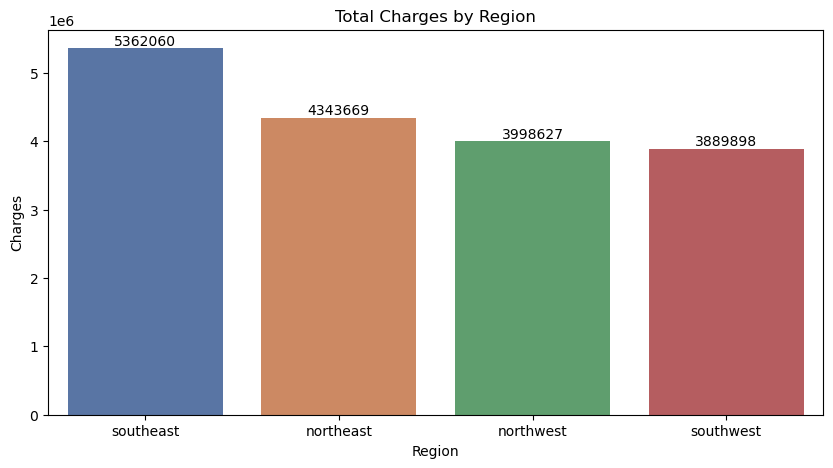

In [31]:
# Charges by region on a bar chat

plt.figure(figsize=(10,5))

region_charges = df.groupby("Region")["Charges"].sum().reset_index()

# Sort the DataFrame in descending order based on the Charges column
region_charges = region_charges.sort_values(by="Charges", ascending=False)

region_chr= sns.barplot(x="Region", data=region_charges, y="Charges", palette="deep", order = region_charges["Region"])

for i, value in enumerate(region_charges['Charges']):
    plt.text(i, value, f'{value:.0f}', ha='center', va='bottom')

plt.title("Total Charges by Region")
plt.show()

In [32]:
# Total Charges by Region
region_cnt = df.groupby("Region")["Charges"].sum().reset_index()
region_cnt

,Region,Charges
0,northeast,4.343669e+06
1,northwest,3.998627e+06
2,southeast,5.362060e+06
3,southwest,3.889898e+06


#### The population of clients in each region is quite similar, with the exception of Southeast, which is slightly higher at 27%. The other three regions all have a population percentage of 25%.

#### In contrast, when considering the total income generated by each region, Southeast stands out with 30%, making it the highest income-generating region. The Northeast follows closely at 25%, the North West at 23%, and the South West at 22%.

### Distribution of Age by Charges

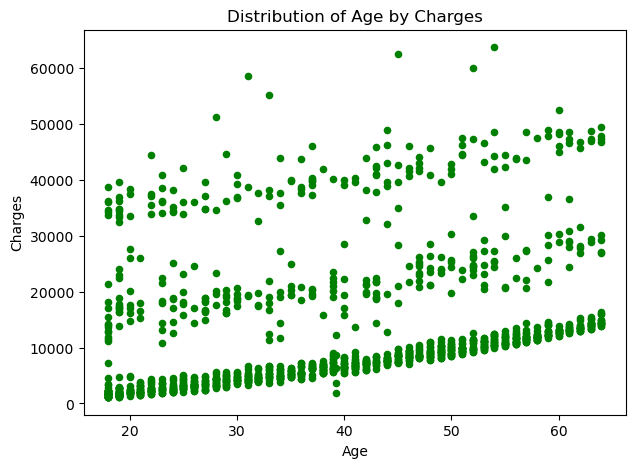

In [33]:
# Age by Charges on a scatter plot
df.plot(kind="scatter", x="Age", y="Charges", color="green", figsize=(7, 5), title="Distribution of Age by Charges")
plt.show()

#### Based on the visual above, there is a clear trend indicating that as age increases, the charges also increase proportionally.

### Children By Age Group

In [34]:
## Children by Age group and charges on a bar plot using matplot lib only
# age_group_child= df.groupby("Age_Group")["children"].sum().reset_index()
#age_group_child

#age_group_child.plot(kind="barh", figsize=(15,5), color="brown", title="Children by Age Group");

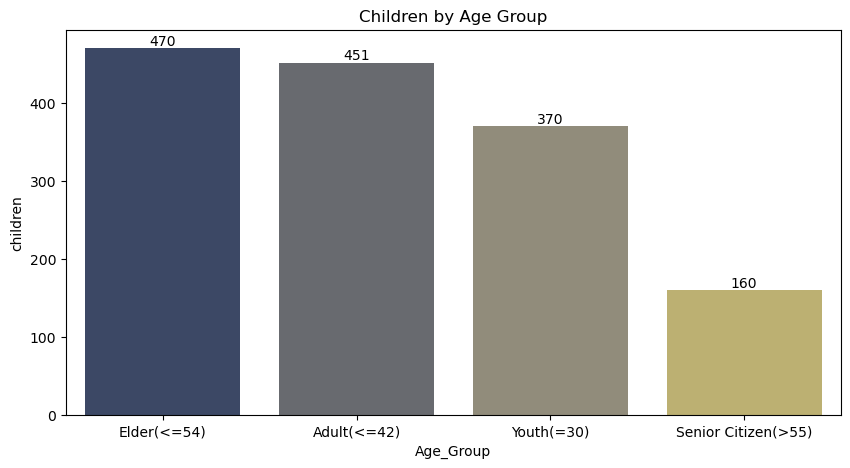

In [35]:
plt.figure(figsize=(10, 5))

age_group_child = df.groupby("Age_Group")["children"].sum().reset_index()
age_group_child = age_group_child.sort_values(by="children", ascending=False)

age_grp_chld = sns.barplot(x="Age_Group", data=age_group_child, y="children", palette="cividis", order=age_group_child["Age_Group"])

for i, value in enumerate(age_group_child['children']):
    plt.text(i, value, f'{value:.0f}', ha='center', va='bottom')
    
plt.title("Children by Age Group")
plt.show()

In [36]:
# Children by Age Group
cnt_child = df.groupby("Age_Group")["children"].sum().reset_index()
cnt_child

,Age_Group,children
0,Adult(<=42),451
1,Elder(<=54),470
2,Senior Citizen(>55),160
3,Youth(=30),370


#### The above chart and DataFrame reveal the distribution of the number of children with Parent/Guardian age groups. It indicates that the Age group 43-54 has the highest percentage of children, accounting for 32%. Following closely is the Age group 31-42 with 31% of the children. The Age group 30 and below comprises 26% of the children, and finally, the Age group 55 and above represents 11% of the children.

### Gender Distribution

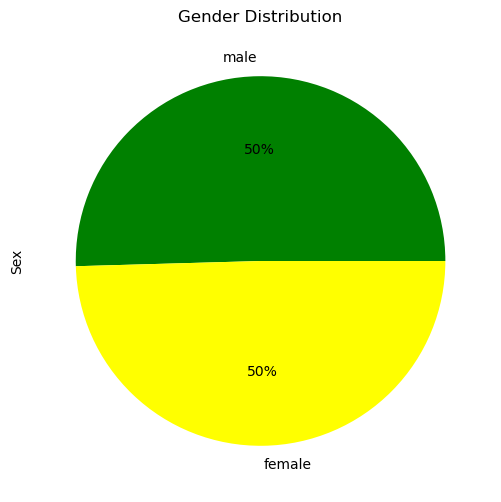

In [37]:
# Gender Distribution
df["Sex"].value_counts().plot(kind="pie", colors=["green","yellow"], figsize=(6,6), title="Gender Distribution", autopct='%1.0f%%');

#### Gender is equal with 50% each for male and female

### Body Mass Index (BMI) by Charges

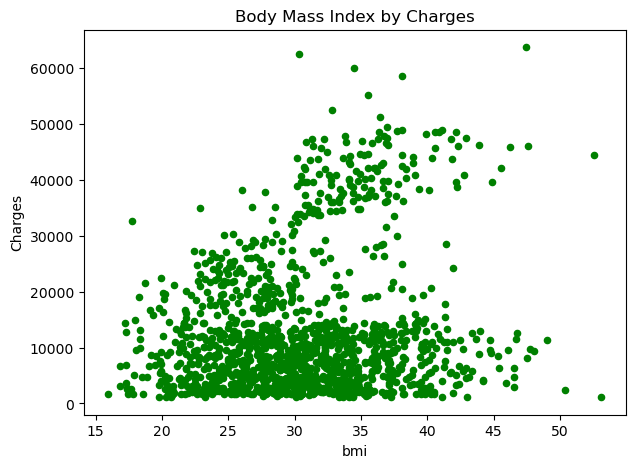

In [38]:
# bmi by charges on a sctter plot

df.plot(kind="scatter",x="bmi", y="Charges", figsize=(7,5), color="green", title="Body Mass Index by Charges");

#### The charts above illustrate that the majority of clients pay less than £30,000, whereas those paying above £30,000 generally have a BMI between 30 and 35.

### Body Mass Index (BMI) by Age

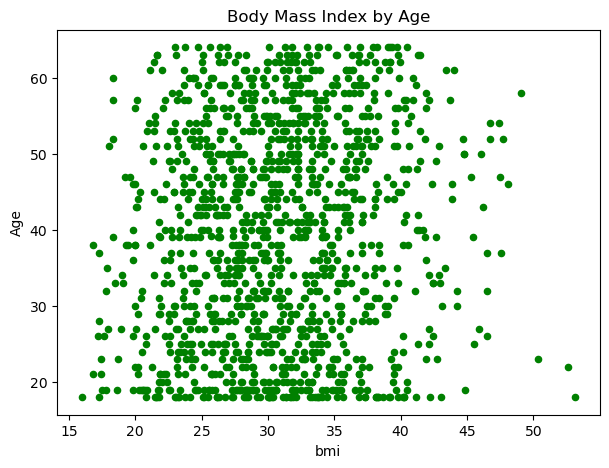

In [39]:
# Body Mass Index by Age
df.plot(kind="scatter", x="bmi", y="Age", figsize=(7,5), color="green", title="Body Mass Index by Age");

#### Based on the chart above, it can be observed that there is little to no correlation between the age of clients and their BMI.